In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### Load and describe data

In [10]:
data = pd.read_csv(str(Path("../data/interim/regularized.csv")), 
                   parse_dates=True, infer_datetime_format=True, index_col=0)
stats = data.describe()
stats.loc['IQR'] = (stats.loc['75%'] - stats.loc['25%'])
stats.loc['low'] = stats.loc['25%'] - (1.5 * stats.loc['IQR'])
stats.loc['high'] = stats.loc['75%'] + (1.5 * stats.loc['IQR'])
stats.loc['outliers'] = (stats.loc['min'] < stats.loc['low']) | (stats.loc['max'] > stats.loc['high'])
stats.loc['outliers'] = (stats.loc['outliers']).map(bool)
stats

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
count,43824,43824,43824,43824,43824,43824,43824
mean,0.573066,0.610588,0.636734,0.59652,0.205269,0.273036,0.535555
std,0.186322,0.191065,0.19144,0.280408,0.116612,0.0662406,0.133814
min,0,0,0,0,0,0,0
25%,0.434641,0.475265,0.5,0.388889,0.1125,0.299379,0.451049
50%,0.576797,0.616608,0.651163,0.666667,0.1875,0.299379,0.538462
75%,0.730392,0.770318,0.77907,0.833333,0.275,0.299379,0.622378
max,1,1,1,1,1,1,1
IQR,0.295752,0.295053,0.27907,0.444444,0.1625,0,0.171329
low,-0.00898693,0.0326855,0.0813953,-0.277778,-0.13125,0.299379,0.194056


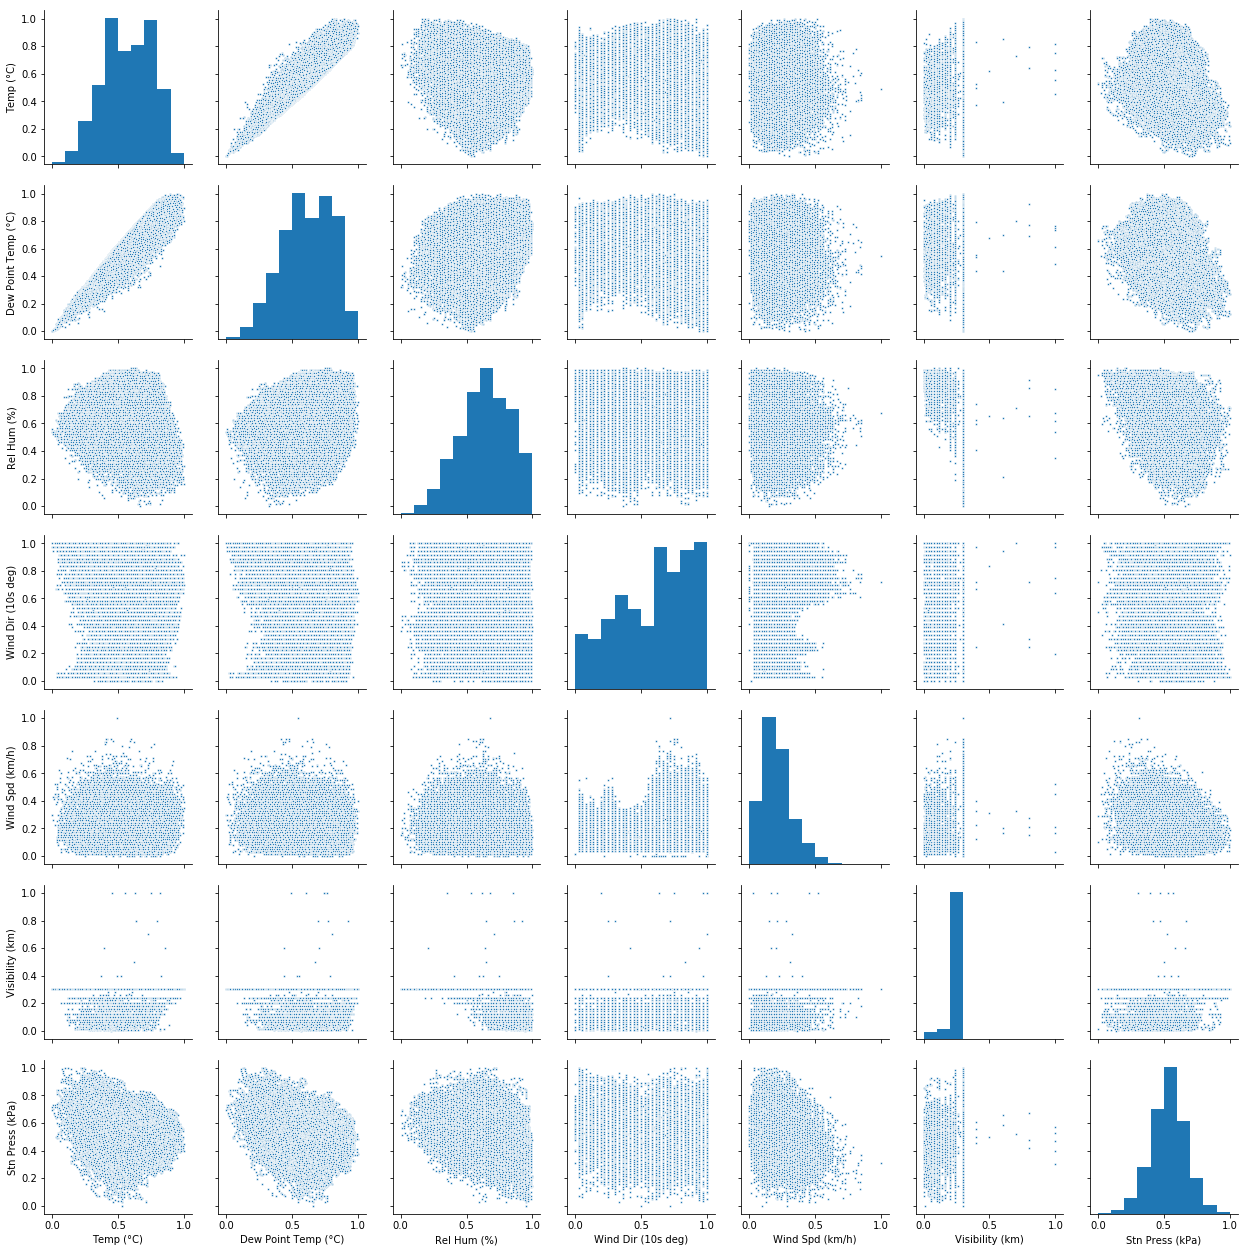

In [3]:
sns.pairplot(data, plot_kws={"s":6})
plt.show()

### Look for features with high correlation
#### We want to remove features that have extremely high correlation with another feature, and essentially do not provide any new information for training the model. (No formal threshold for "extremely high" - we eyeball the decision.)

In [11]:
data.corr()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
Temp (°C),1.000000,0.935176,-0.175934,-0.099376,-0.145737,0.161830,-0.199613
Dew Point Temp (°C),0.935176,1.000000,0.177781,-0.125077,-0.220599,0.014149,-0.283575
Rel Hum (%),-0.175934,0.177781,1.000000,-0.090743,-0.221801,-0.487409,-0.254726
Wind Dir (10s deg),-0.099376,-0.125077,-0.090743,1.000000,0.265732,0.167556,-0.067362
Wind Spd (km/h),-0.145737,-0.220599,-0.221801,0.265732,1.000000,0.074377,-0.266084
Visibility (km),0.161830,0.014149,-0.487409,0.167556,0.074377,1.000000,0.217511
Stn Press (kPa),-0.199613,-0.283575,-0.254726,-0.067362,-0.266084,0.217511,1.000000


In [12]:
# Drop Dew Point Temp due to high correlation with Temp.
data.pop('Dew Point Temp (°C)');

### Look for features with low variance
#### We want to remove features that have extremely low variance because they are nearly constant and thus do not provide useful information for training the model. (No formal threshold for "extremely low" - we eyeball the decision.)

In [13]:
# Drop Visibility column due to low variance (IQR = 0)
data.pop('Visibility (km)');

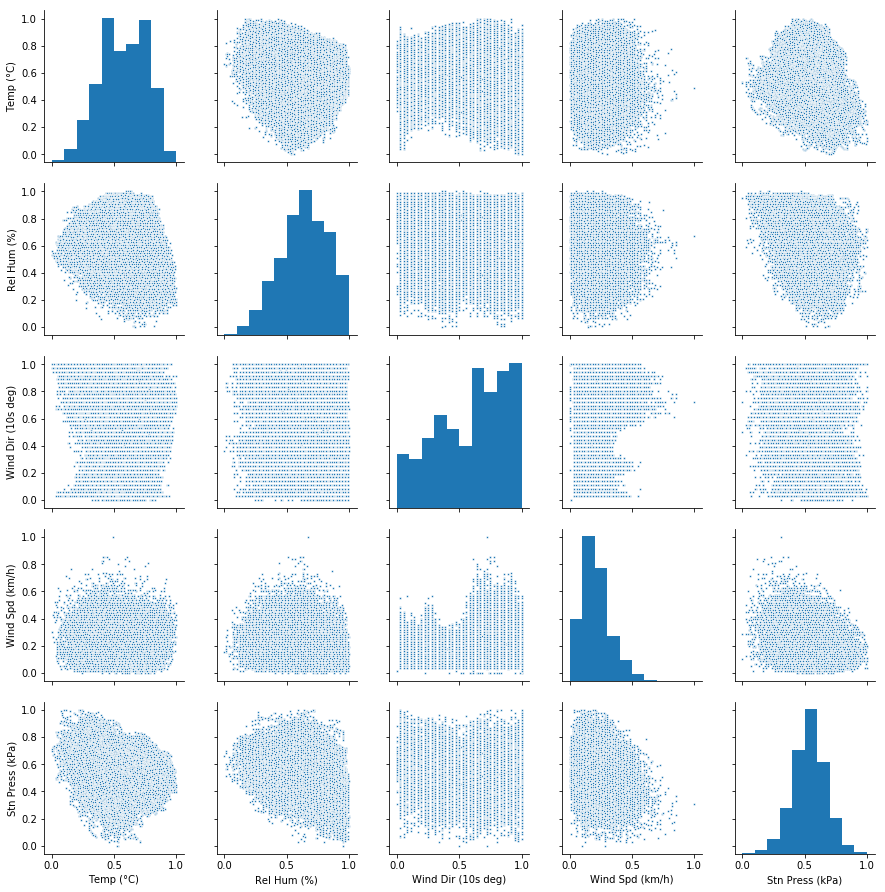

In [14]:
# Visualize remaining features
sns.pairplot(data, plot_kws={"s":6})
plt.show()